In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import urllib

In [2]:
# Import API key
from api_keys import api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for lat&lngs and cities
lat_lngs = []
cities = []

In [7]:
# Random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Nearest cities!
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



636

In [9]:
print(cities)
# for x in cities:

['tazovskiy', 'new norfolk', 'puerto ayora', 'chernyshevskiy', 'thompson', 'hithadhoo', 'carnarvon', 'ushuaia', 'punta arenas', 'dong hoi', 'nuuk', 'bud', 'port blair', 'nikolskoye', 'atuona', 'plettenberg bay', 'hilo', 'port-cartier', 'hermanus', 'airai', 'cape town', 'hobart', 'asau', 'kahului', 'vaini', 'taolanaro', 'illoqqortoormiut', 'busselton', 'evensk', 'nishihara', 'mataura', 'kapaa', 'namibe', 'grand gaube', 'chkalovskoye', 'santa cruz', 'margate', 'edson', 'pisco', 'grand river south east', 'seabrook', 'mahebourg', 'morden', 'nguiu', 'rikitea', 'garowe', 'albany', 'castro', 'tessalit', 'curup', 'tuatapere', 'mar del plata', 'kaitangata', 'port hardy', 'paita', 'khatanga', 'bethel', 'pevek', 'port alfred', 'chokurdakh', 'batemans bay', 'santa rosa', 'saldanha', 'sao jose da coroa grande', 'rio gallegos', 'barentsburg', 'caldas novas', 'elko', 'adrar', 'wukari', 'frontera', 'kitaibaraki', 'dauriya', 'shitanjing', 'tual', 'muisne', 'vanimo', 'roald', 'verkhoyansk', 'iracoubo', 

In [10]:
# Starting URL for Weather Map API Call
api_key = "cc8fe17c669444020036c0bc97d5bc78"

In [11]:
print(cities[0])

tazovskiy


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

big_list = []

# city_list_pd = pd.DataFrame(big_list)

# city_list_pd.head()

print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Counters
record_count = 1
set_count = 1

# Loop through all the cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     for city in cities:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
#         city_trial = url +"&q=" + urllib.request.pathname2url(city) + cities[1]

#         pprint(city_weather)
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
    
        big_list.append({
            "City": city,
            "Lat": city_lat,
            "Long": city_lon,
            "Max Temperature": city_max_temp,
            "Humidity": city_humidity,
            "Clouds": city_clouds,
            "Winds": city_wind,
            "Country": city_country,
            "Date": city_date})
    

    # If an error is experienced, skip the city
    except:
        print(f"still running for {city}, please be patient")
        pass
              

print("-----------------------------")
print("Complete                     ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
still running for asau, please be patient
still running for taolanaro, please be patient
still running for illoqqortoormiut, please be patient
still running for chkalovskoye, please be patient
still running for grand river south east, please be patient
still running for nguiu, please be patient
still running for barentsburg, please be patient
still running for zhanatas, please be patient
still running for vaitupu, please be patient
still running for bengkulu, please be patient
still running for sentyabrskiy, please be patient
still running for tsihombe, please be patient
still running for belushya guba, please be patient
still running for bolonchen, please be patient
still running for chupei, please be patient
still running for uren, please be patient
still running for jiroft, please be patient
still running for marcona, please be patient
still running for louisbourg, please be patient
still runni

 Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [13]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(big_list)


lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Clouds"]
wind_speed = city_data_pd["Winds"]


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
city_data_pd.to_csv("output_data_file.csv", encoding="utf-8", index=False)

# Show Record Count
city_data_pd.count()

City               577
Lat                577
Long               577
Max Temperature    577
Humidity           577
Clouds             577
Winds              577
Country            577
Date               577
dtype: int64

In [14]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Long,Max Temperature,Humidity,Clouds,Winds,Country,Date
0,tazovskiy,67.47,78.70,-19.98,97,44,6.13,RU,1577420745
1,new norfolk,-42.78,147.06,72.00,42,20,11.41,AU,1577420746
2,puerto ayora,-0.74,-90.35,73.99,89,100,1.01,EC,1577420449
3,chernyshevskiy,63.01,112.47,-29.25,96,100,5.93,RU,1577420746
4,thompson,55.74,-97.86,17.60,92,90,3.36,CA,1577420746


 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

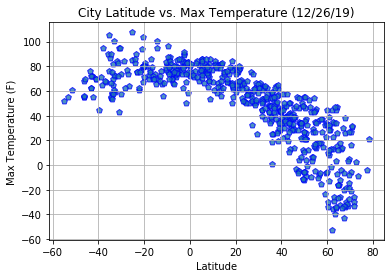

In [24]:
#lat vs. temp
plt.scatter(lats, 
            max_temps,
            edgecolor="blue", linewidths=1, marker="p", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weatherpy/Latitude_Max_temp.png")

# Show plot
plt.show()

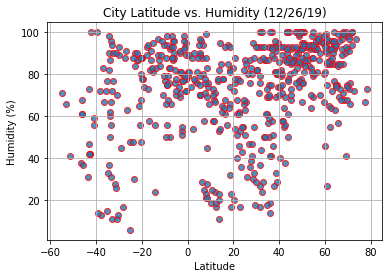

In [29]:
#lat vs. humid
plt.scatter(lats, 
            humidity,
            edgecolor="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weatherpy/Latitude_Humidity.png")

# Show plot
plt.show()

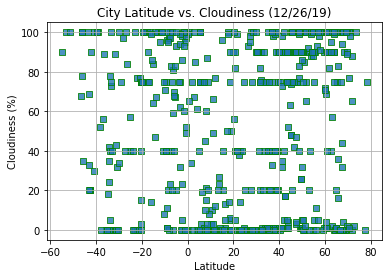

In [30]:
#lat vs. cloud
plt.scatter(lats, 
            cloudiness,
            edgecolor="green", linewidths=1, marker="s", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weatherpy/Latitude_Cloudliness.png")

# Show plot
plt.show()

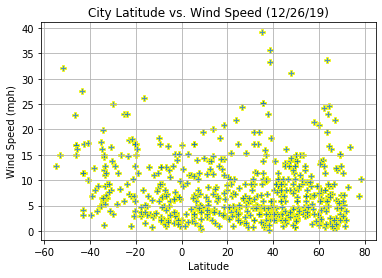

In [28]:
#lat vs. wind
plt.scatter(lats, 
            wind_speed,
            edgecolor="yellow", linewidths=1, marker="P", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weatherpy/Latitude_windspeed.png")

# Show plot
plt.show()